
# Find the best neighborhood
## Freiburg, Germany

## Introduction:
Usually people tend to explore the places before moving to a new country, state, city or place for their work or to start a new life and that involves so many factors including neighborhood analysis. That calls for a search algorithm that usually returns the requested features such as population rate, median house price, school ratings, crime rates, weather conditions, recreational facilities etc. It’d be nice to have a hassle-free application that could spit out an extensive analysis of all these features for a neighborhood or a comparative analysis between neighborhoods with just sending out the names of the neighborhoods. 
This Project takes this requirement as its main idea to help the stakeholders to achieve the desired results, so as to help them spend their time and money in some other productive means rather keep them trapped in an infinite loop of extensive search engines. 
This Project would help the stakeholders take a better decision on choosing the best neighborhood out of many neighborhoods to build/buy their houses in Freiburg city based on the distribution of various facilities in and around that neighborhood. As an example, this project would compare 2 randomly picked neighborhoods and analyses the top 5 most common venues in each of those two neighborhoods based on the number of visits by people in each of those places. 

## Data:
For this demonstration, I will simplify the analysis by using the following criterium for comparison: 1. school rating 2. house price 3. popular venues.
This demonstration will make use of the following data sources. Some of the original data sources are in German. I will translate the necessary parts in English such as "Stadtteil" means neighborhood and "Postleitzahl" means zip code. 

 1.List of Freiburg's neighborhoods and their zip code Data will retrieved from https://www.suche-postleitzahl.org/freiburg-plz-79098-79117.40f9 
2. Average immobilien price for the selected neighborhoods https://www.immoverkauf24.de/immobilienpreise/preise-freiburg/ 
3. school rating https://freiburg.stadtbesten.de/besten-liste/die-besten-allgemeinbildenden-gymnasien-in-freiburg/ 
4. Freiburg location data retrieved using Foursquare location API. (FourSquare website: www.foursquare.co

Foursquare API:
This project would use Four-square API as its prime data gathering source as it has a database of more than 105 million places, especially their places API which provides the ability to perform location search, location sharing and details about a business. Photos, tips and reviews jolted by Foursquare users can also be used in many productive ways to add value to the results.

## Work Flow:
HTTP requests would be made to this Foursquare API server using zip codes of the Freiburg city neighborhoods to pull the location information (Latitude and Longitude).

Foursquare API search feature would be enabled to collect the nearby places of the neighborhoods. Due to http request limitations the number of places per neighborhood parameter would reasonably be set to 100 and the radius parameter would be set to 700.

Folium- Python visualization library would be used to visualize the neighborhoods cluster distribution of Freiburg city over an interactive leaflet map.

Extensive comparative analysis of two randomly picked neighborhoods world be carried out to derive the desirable insights from the outcomes using python’s scientific libraries Pandas, NumPy and Scikit-learn.

Unsupervised machine learning algorithm K-mean clustering would be applied to form the clusters of different categories of places residing in and around the neighborhoods. These clusters from each of those two chosen neighborhoods would be analyzed individually collectively and comparatively to derive the conclusions.

### Python packages and Dependencies:
• Pandas - Library for Data Analysis • NumPy – Library to handle data in a vectorized manner • JSON – Library to handle JSON files • Geopy – To retrieve Location Data • Requests – Library to handle http requests • Matplotlib – Python Plotting Module • Sklearn – Python machine learning Library • Folium – Map rendering Library


In [3]:
#Dependencies
from bs4 import BeautifulSoup #Python Web scraping library
import requests # library to handle requests
import json # library to handle JSON files
import xml
import pandas as pd #Python library data manipulation and analysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


from geopy.geocoders import Nominatim # convert an address into latitude and longitude values


from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans
!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

Solving environment: ...working... done

# All requested packages already installed.



In [4]:
#Collecting Neighborhoods and their Postalcodes by web scraping
url='https://www.suche-postleitzahl.org/freiburg-plz-79098-79117.40f9'
source = requests.get(url).text

soup = BeautifulSoup(source,'xml')#Beautiful Soup to Parse the url page
print(soup.prettify())


<?xml version="1.0" encoding="utf-8"?>
<!DOCTYPE html>
<html lang="de">
 <head>
  <meta content="width=device-width, initial-scale=1, maximum-scale=5" name="viewport">
   <meta content="#303030" name="theme-color">
    <link href="https://www.suche-postleitzahl.org/manifest.json" rel="manifest">
     <link href="https://www.suche-postleitzahl.org/amp/freiburg-plz-79098-79117.40f9" rel="amphtml">
      <title>
       Postleitzahl Freiburg im Breisgau
      </title>
      <meta content="text/html; charset=UTF-8" http-equiv="Content-Type">
       <meta content="Die Stadt Freiburg im Breisgau liegt im Bundesland Baden-Württemberg. Der Stadtplan mit PLZ-Karte zeigt alle Straßen und Stadtteile rund um den Ort." name="description">
        <link href="https://www.suche-postleitzahl.org/source/css/style.min.040.css" media="screen" rel="stylesheet" type="text/css">
         <link href="https://www.suche-postleitzahl.org/source/css/print.css" media="print" rel="stylesheet" type="text/css">
     

In [21]:
divi = soup.find('table',attrs={'class': 'table table-striped table-hover'})
divi

<table class="table table-striped table-hover">
<thead class="gradient-gray">
<tr>
<th>Stadtteil</th>
<th>Postleitzahl</th></tr>
</thead>
<tbody>
<tr data-ot="ot-13f3f"><td data-id="16633" data-lat="47.99360508" data-lon="7.84542918" data-title="Altstadt"><span class="open-ziplight-map"><i class="fa fa-map-marker fa-pad-right text-muted no-mobile"/> Altstadt</span></td><td class="ziplinks"><a href="https://www.suche-postleitzahl.org/plz-gebiet/79098">79098</a>, <a href="https://www.suche-postleitzahl.org/plz-gebiet/79104">79104</a></td></tr><tr data-ot="ot-13f4d"><td data-id="16633" data-lat="48.0099439" data-lon="7.81291544" data-title="Betzenhausen"><span class="open-ziplight-map"><i class="fa fa-map-marker fa-pad-right text-muted no-mobile"/> Betzenhausen</span></td><td class="ziplinks"><a href="https://www.suche-postleitzahl.org/plz-gebiet/79106">79106</a>, <a href="https://www.suche-postleitzahl.org/plz-gebiet/79110">79110</a>, <a href="https://www.suche-postleitzahl.org/plz-gebie

In [82]:
Zipcode      = []
Neighborhood = []


# extracting a clean form of the table
for tr_cell in divi.find_all('tr'):
    
    counter = 1
    Zipcode_var      = -1
    Neighborhood_var = -1
    
    for td_cell in tr_cell.find_all('td'):
        if counter == 1: 
            Neighborhood_var = td_cell.text
        if counter == 2: 
            Zipcode_var = str(td_cell.text).strip()
            tag_a_Zipcode = td_cell.find('a')
            
        counter +=1
        
    if (Zipcode_var == 'Not assigned'or Neighborhood_var == 'Not assigned'): 
        continue
    try:
        if (tag_a_Zipcode is None):
            continue
    except:
        pass
    if(Zipcode_var == -1 or Neighborhood_var == -1):
        continue
        
    Zipcode.append(Zipcode_var[:5])
    Neighborhood.append(Neighborhood_var)

In [101]:
#Create a dataframe listing the neighborhoods and zipcodes
df=pd.DataFrame({'Neighborhood':Neighborhood, 'Zipcode': Zipcode})

df

,Neighborhood,Zipcode
0,Altstadt,79098
1,Betzenhausen,79106
2,Brühl,79106
3,Ebnet,79117
4,Günterstal,79100
5,Haslach,79111
6,Herdern,79104
7,Hochdorf,79108
8,Kappel,79117
9,Landwasser,79110


From the html we can randomly choose two neighborhoods such as "Haslach" and "Rieselfeld" and extract their lattitude and longitutde data.

In [104]:
neighborhood=['Haslach', 'Rieselfeld']
longitude=[7.82007694, 7.79207468]
latitude=[47.99036685, 47.99878869]


In [105]:
main_df=pd.DataFrame({'Neighborhood':neighborhood, 'Latitude':latitude, 'Longitude':longitude})

main_df

,Neighborhood,Latitude,Longitude
0,Haslach,47.990367,7.820077
1,Rieselfeld,47.998789,7.792075


Create a map for Freiburg and these two chosen neighborhoods

In [107]:
# Freiburg data
address_fr = 'Freiburg'
latitude_fr = 47.9959
longitude_fr = 7.85222


In [108]:
map_fr = folium.Map(location=[latitude_fr, longitude_fr], zoom_start=12)

In [109]:
# add markers to map
for lat, lng, label in zip(main_df['Latitude'], main_df['Longitude'], main_df['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=20,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_fr) 
    
display(map_fr)

### 1. Gather and visualize the school ratings for each neighborhood

In [150]:
# Source: https://freiburg.stadtbesten.de/besten-liste/die-besten-allgemeinbildenden-gymnasien-in-freiburg/
school_ratings=pd.DataFrame({"Neighborhood":df["Neighborhood"],
                                      "Top School Rating":[8,9,9,8,10,10,7,10,6,8,9,8,7,6,7,8,6,9,9,6,9,5,5,9,4,7,7,3]})
school_ratings

,Neighborhood,Top School Rating
0,Altstadt,8
1,Betzenhausen,9
2,Brühl,9
3,Ebnet,8
4,Günterstal,10
5,Haslach,10
6,Herdern,7
7,Hochdorf,10
8,Kappel,6
9,Landwasser,8


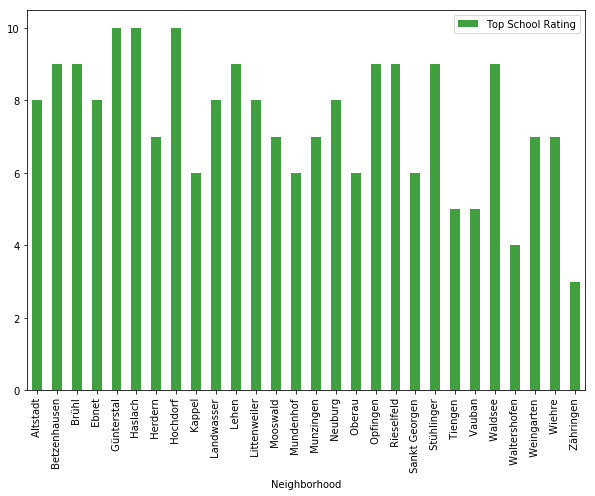

In [151]:
school_ratings.set_index('Neighborhood',inplace=True,drop=True)
school_ratings.plot(kind='bar',figsize=(10,7),color='green',alpha=0.75);

### 2. Gather and visualize the house price for each neighborhood


In [177]:
# Source: https://www.wohnungsboerse.net/immobilienpreise-Freiburg-im-Breisgau/309
# The price below is the average price with unit as €/m²
Avg_ImmoPrice=pd.DataFrame({"Neighborhood":df["Neighborhood"],
                                      "Average House Price":[4610,4234,4200,3300,4000,
                                                                  4499,6386,4100,5051,3232,3810,5315,4200,4000,3900,
                                                                  3500,4530,5599,4521,4510,4639,4696,3033,4000,4100,
                                                                  4077,5531,5151]})

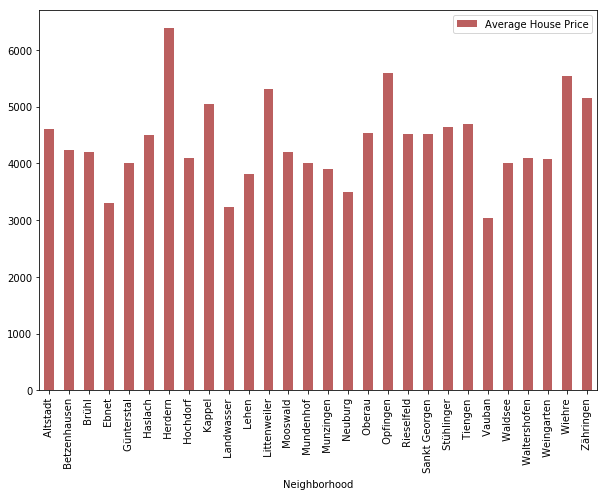

In [178]:
Avg_ImmoPrice.set_index('Neighborhood',inplace=True,drop=True)
Avg_ImmoPrice.plot(kind='bar',figsize=(10,7),color='brown',alpha=0.75);

### 3. Analyses the top 5 most common venues in the chosen neighborhoods based on the number of visits by people in each of those places

In [181]:
# Hide cells for credentials

In [126]:
# Find the venues in Freiburg

radius = 700 
LIMIT = 100
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    Client_ID, 
    Client_Secret, 
    VERSION, 
    latitude_fr, 
   longitude_fr, 
    radius, 
   LIMIT)

results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5ccc4e0f4c1f6743c827c3d0'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Altstadt-Mitte',
  'headerFullLocation': 'Altstadt-Mitte, Freiburg',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 80,
  'suggestedBounds': {'ne': {'lat': 48.00220000630001,
    'lng': 7.861616885619987},
   'sw': {'lat': 47.98959999369999, 'lng': 7.842823114380013}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b7fed78f964a520eb4430e3',
       'name': 'Münsterplatz',
       'location': {'address': 'Münsterplatz',
        'lat': 47.9958601934988,
        'lng': 7.852422594068076,
        'labeledLatLngs': [{'label': 'display',
          'lat': 47.9

In [127]:
venues=results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues)
nearby_venues.columns

Index(['reasons.count', 'reasons.items', 'referralId', 'venue.categories',
       'venue.id', 'venue.location.address', 'venue.location.cc',
       'venue.location.city', 'venue.location.country',
       'venue.location.crossStreet', 'venue.location.distance',
       'venue.location.formattedAddress', 'venue.location.labeledLatLngs',
       'venue.location.lat', 'venue.location.lng',
       'venue.location.neighborhood', 'venue.location.postalCode',
       'venue.location.state', 'venue.name', 'venue.photos.count',
       'venue.photos.groups', 'venue.venuePage.id'],
      dtype='object')

In [128]:
# Categorize the venues
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']



In [129]:
#See one example of the categorized results

filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]
nearby_venues["venue.categories"][1]

[{'id': '4bf58dd8d48988d123941735',
  'name': 'Wine Bar',
  'pluralName': 'Wine Bars',
  'shortName': 'Wine Bar',
  'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/winery_',
   'suffix': '.png'},
  'primary': True}]

In [130]:
#See the whole list
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues

,name,categories,lat,lng
0,Münsterplatz,Plaza,47.995860,7.852423
1,Alte Wache (Haus der Badischen Weine),Wine Bar,47.995256,7.853137
2,Münster Unserer Lieben Frau,Church,47.995537,7.852160
3,Hausbrauerei Feierling,Brewery,47.993402,7.852724
4,Basho-An,Japanese Restaurant,47.997539,7.849707
5,Schlappen,Bar,47.994056,7.848658
6,Burger Chalet,Burger Joint,47.994647,7.847936
7,Kolben Kaffee Akademie,Café,47.993683,7.849073
8,Restaurant Wolfshöhle,Restaurant,47.994402,7.854698
9,Historisches Kaufhaus,Convention Center,47.995210,7.852722


In [131]:
#Find the venues for each neighborhood
def getNearbyVenues(names, latitudes, longitudes, radius=700):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            Client_ID, 
            Client_Secret, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        venue_results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in venue_results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [132]:
# Extract the numbers of venues for the chosen neighborhoods
venues = getNearbyVenues(names=main_df['Neighborhood'],
                                   latitudes=main_df['Latitude'],
                                   longitudes=main_df['Longitude']
                                  )
venues.groupby('Neighborhood').count()

Haslach
Rieselfeld


,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Haslach,9,9,9,9,9,9
Rieselfeld,6,6,6,6,6,6


In [134]:
# one hot encoding
onehot = pd.get_dummies(venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
onehot['Neighborhood'] = venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [onehot.columns[-1]] + list(onehot.columns[:-1])
onehot = onehot[fixed_columns]
onehot



,Neighborhood,Athletics & Sports,Bakery,Café,Climbing Gym,Gym / Fitness Center,Hotel,Italian Restaurant,Supermarket,Tram Station
0,Haslach,0,0,0,0,1,0,0,0,0
1,Haslach,0,0,0,0,0,0,1,0,0
2,Haslach,0,0,0,0,0,0,0,1,0
3,Haslach,0,0,0,0,0,0,0,1,0
4,Haslach,0,0,0,0,0,0,0,0,1
5,Haslach,0,0,0,0,0,1,0,0,0
6,Haslach,0,1,0,0,0,0,0,0,0
7,Haslach,0,0,1,0,0,0,0,0,0
8,Haslach,0,0,0,0,0,0,0,1,0
9,Rieselfeld,0,0,0,0,0,0,0,1,0


In [136]:
#Group the result by neighborhood
grouped = onehot.groupby('Neighborhood').mean().reset_index()
grouped.head

<bound method NDFrame.head of   Neighborhood  Athletics & Sports    Bakery      Café  Climbing Gym  \
0      Haslach            0.000000  0.111111  0.111111      0.000000   
1   Rieselfeld            0.166667  0.000000  0.000000      0.166667   

   Gym / Fitness Center     Hotel  Italian Restaurant  Supermarket  \
0              0.111111  0.111111            0.111111     0.333333   
1              0.166667  0.000000            0.166667     0.333333   

   Tram Station  
0      0.111111  
1      0.000000  >

In [137]:
# Find out the top 5 venues of each neighborhood
num_top_venues = 5
for hood in grouped['Neighborhood']:
    print("----"+hood+"----")
    temp =grouped[grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Haslach----
                  venue  freq
0           Supermarket  0.33
1                Bakery  0.11
2                  Café  0.11
3  Gym / Fitness Center  0.11
4                 Hotel  0.11


----Rieselfeld----
                  venue  freq
0           Supermarket  0.33
1    Athletics & Sports  0.17
2          Climbing Gym  0.17
3  Gym / Fitness Center  0.17
4    Italian Restaurant  0.17




In [138]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [141]:
import numpy as np
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = grouped['Neighborhood']

for ind in np.arange(grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Haslach,Supermarket,Tram Station,Italian Restaurant,Hotel,Gym / Fitness Center
1,Rieselfeld,Supermarket,Italian Restaurant,Gym / Fitness Center,Climbing Gym,Athletics & Sports


## Comparison and Discussion

### 1. Compare the school rating for the chosen neighborhoods

In [171]:
School_rating_comparison=school_ratings.loc[[' Haslach',' Rieselfeld']]
School_rating_comparison

,Top School Rating
Neighborhood,
Haslach,10
Rieselfeld,9


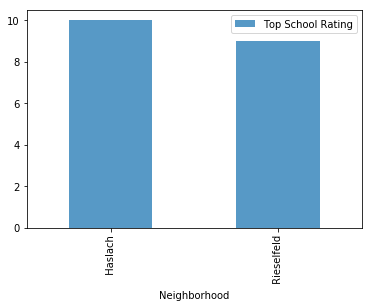

In [172]:
School_rating_comparison.plot(kind='bar',alpha=0.75)

Haslach has better school rating than Rieselfeld

### 2. Compare the house price

In [179]:
Avg_housing_price_comparison=Avg_ImmoPrice.loc[[' Haslach',' Rieselfeld']]
Avg_housing_price_comparison

,Average House Price
Neighborhood,
Haslach,4499
Rieselfeld,4521


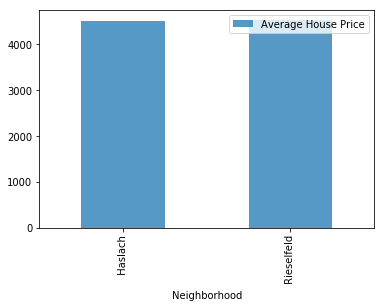

In [180]:
Avg_housing_price_comparison.plot(kind='bar',alpha=0.75)

Haslach's house price is slightly lower than Rieselfeld's.

### 3. Compare the popular venues

In [176]:
neighboods
Venue_comparison=neighborhoods_venues_sorted.T
Venue_comparison

,0,1
Neighborhood,Haslach,Rieselfeld
1st Most Common Venue,Supermarket,Supermarket
2nd Most Common Venue,Tram Station,Italian Restaurant
3rd Most Common Venue,Italian Restaurant,Gym / Fitness Center
4th Most Common Venue,Hotel,Climbing Gym
5th Most Common Venue,Gym / Fitness Center,Athletics & Sports


The stakeholder can choose Haslach if he or she prefer better public traffic possibilities because the tram station is quite popular there, and choose Rieselfeld if he or she prefer more sport infrastructures.

## Conclusion

Haslach is slighly better than Rieselfeld because the school ranks higher, the house price is cheaper compared to Rieselfeld. In addition, the public traffic is more convenient in Haslach. But the differences are not huge, you can choose Rieselfeld if you enjoy doing sports.